In [1]:
import matplotlib.pyplot as plt
from Functions.connection.connection import *
from Functions.Models.Logistic_regression import *
from Functions.Models.Random_forest import *
from Functions.Models.xgboost import *
from Functions.Models.evaluation import *
from Functions.Pipelines.pipeline_NLP import *


In [2]:
creds = ["uktuserdaroglu","Vacy4201(Pri","172.20.20.4","hgo",3306]
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
392


In [3]:
alertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)

/Users/utkuserdaroglu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
alertP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

In [5]:
data = pre_process(alertP1)

TypeError: 'tuple' object is not callable

In [9]:
data1=data.copy()
pipeline = Pipeline([
    
        # Synonyms
        #('synonyms', FunctionTransformer(synonyms)),
        #LDA
         #('LDA', FunctionTransformer(LDA)),
        #bert
        ('bert', FunctionTransformer(bert)),
    ])

data1= pipeline.fit_transform(data1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marouankamoun/nltk_data...
[nltk_data]   Package stopwords is a

In [11]:
data1

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,4_score,5_score,6_score,7_score,8_score,9_score,10_score,11_score,12_score,13_score
0,EGBZZB,VLNMEEM,LOHHHSHT,SSDBHEA,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,0,...,0.310938,0.431913,0.176764,0.072835,0.200414,0.286651,0.281074,0.255165,-0.041922,0.260446
1,FGSEDD,MIVCNDB,LOHHLSTU,,0,,OUTRA,,unknown,7,...,0.237314,0.395145,0.206825,0.335640,0.279991,0.269846,0.285896,0.288742,0.065241,0.348118
2,BSEZF,LLCBVJI,LOHHLTRS,SCCABHA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,53,...,0.143733,0.286409,0.244220,0.084430,0.263074,0.260910,0.109916,0.188139,-0.061723,0.213863
3,ESSSBD,LLDDNEN,LOHHLTSH,SCCBZCA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,0,...,0.194199,0.227143,0.309399,0.058495,0.239166,0.251899,0.222918,0.191948,-0.093026,0.105836
4,DECZCS,VLEVCVE,LOHHLTOU,SCCDEGG,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0.270879,0.220613,0.273116,-0.014883,0.330790,0.191521,0.280946,0.263200,0.175690,0.174920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,2,Prioritário,0,...,0.255758,0.296468,0.299468,0.270805,0.250356,0.419110,0.199414,0.318860,0.235535,0.293086
1605,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,3,Normal,0,...,0.332542,0.301970,0.408707,0.287457,0.305841,0.295177,0.184666,0.364067,0.082102,0.314031
1606,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,3,Normal,0,...,0.431983,0.452356,0.430526,0.277443,0.362030,0.418600,0.319924,0.280542,0.348064,0.317915
1607,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,,unknown,7,...,0.362650,0.311189,0.258501,0.385268,0.313320,0.399338,0.312490,0.264307,0.123981,0.266927


# Logistic Regression

In [11]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data1.drop(eliminate_cols,axis=1)# Features
y = data1.result # Target variable
features=X.columns
y_pred_train, y_pred_test, coefficients, X_train, X_test, y_train, y_test = log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001230
1,outside area,-0.135925
2,SAM,0.151929
3,SON,-0.013227
4,unknown,-0.862311
5,Other specialities,2.332479
6,2,0.270175
7,3+,0.081074
8,HOSP,-0.126404
9,UCSP,-0.124121


In [12]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.23,0.77,0.98,0.75,0.84
1,Cohen's Kappa,0.64,0.74,0.76,0.85,0.92


In [13]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.23,0.66,1.00,0.66,0.67
1,Cohen's Kappa,0.64,0.72,0.81,0.78,0.79


# XGBOOST

In [12]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data1.drop(eliminate_cols,axis=1)# Features
y = data1.result # Target variable
features=X.columns
y_pred_train, y_pred_test, model_score, X_train, X_test, y_train, y_test = xgb_classifier(X,y)

In [13]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.55,0.83,0.96,0.82,0.87
1,Cohen's Kappa,0.62,0.82,0.88,0.87,0.91


In [14]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.55,0.67,0.93,0.68,0.70
1,Cohen's Kappa,0.62,0.73,0.86,0.76,0.76


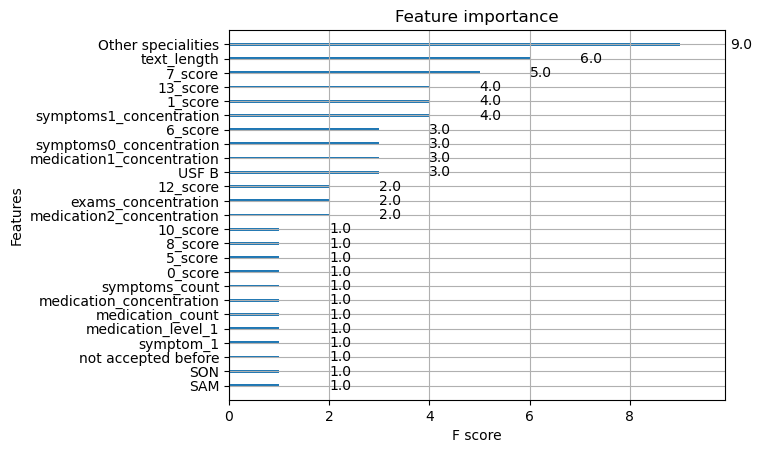

In [10]:
from xgboost import plot_importance

# Plot the feature importance scores
plot_importance(model_score)
plt.show()

# Random Forest

In [12]:
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
y_pred_train, y_pred_test, coefficients, X_train, X_test, y_train, y_test = random_forest(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df.sort_values(by='coefficients',ascending=False)

,Feature,coefficients
0,text_length,0.058663
24,topic_1,0.056906
33,7_score,0.051801
26,0_score,0.041386
39,13_score,0.039821
27,1_score,0.037394
32,6_score,0.037074
31,5_score,0.036950
25,topic_2,0.035912
29,3_score,0.035683


In [13]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="train")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.43,0.99,0.99,1.0,0.99
1,Cohen's Kappa,0.49,0.99,0.99,1.0,1.00


In [14]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.43,0.68,0.99,0.67,0.68
1,Cohen's Kappa,0.49,0.69,0.97,0.69,0.72


In [15]:
evaluate_thresholds(y_pred_train,y_train,y_pred_test,y_test,metrics="test")

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Precision-Recall trade-off,0.43,0.68,0.99,0.67,0.68
1,Cohen's Kappa,0.49,0.69,0.97,0.69,0.72
